In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import seaborn as sb
from prettytable import PrettyTable

In [ ]:
A=[]
h=0.05
j=0.5
while j<2.5:
  A.append(round(j,2))
  j+=h
print(A)
print(len(A))

[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5]
41


In [ ]:
A_=[]
h_=0.05/2
j=0.5
while j<2.5:
  A_.append(round(j,4))
  j+=h_
print(A_)
print(len(A_))

[0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0, 1.025, 1.05, 1.075, 1.1, 1.125, 1.15, 1.175, 1.2, 1.225, 1.25, 1.275, 1.3, 1.325, 1.35, 1.375, 1.4, 1.425, 1.45, 1.475, 1.5, 1.525, 1.55, 1.575, 1.6, 1.625, 1.65, 1.675, 1.7, 1.725, 1.75, 1.775, 1.8, 1.825, 1.85, 1.875, 1.9, 1.925, 1.95, 1.975, 2.0, 2.025, 2.05, 2.075, 2.1, 2.125, 2.15, 2.175, 2.2, 2.225, 2.25, 2.275, 2.3, 2.325, 2.35, 2.375, 2.4, 2.425, 2.45, 2.475, 2.5]
81


In [ ]:
def f(t, x):
    return 38./5.*math.sin(27.*x/(20.*t))

def omega1(t,u,h):
  return f(t,u)

def omega2(t,u,h):
  return f(t+h/2,u+h/2*omega1(t,u,h))

def omega3(t,u,h):
  return f(t+h/2,u+h/2*omega2(t,u,h))

def omega4(t,u,h):
  return f(t+h,u+h*omega3(t,u,h))

In [ ]:
u1=[] #1	Метод Рунге-Кутта порядка m = 4
u1.append(4)
for i in range(1,len(A)):
  t=A[i-1]
  u1.append(round(u1[i-1]+h/6*(omega1(t,u1[i-1],h)+2*omega2(t,u1[i-1],h)+2*omega3(t,u1[i-1],h)+omega4(t,u1[i-1],h)), 4))

print(u1)

[4, 3.8233, 3.9473, 4.1793, 4.4512, 4.7411, 5.0403, 5.3446, 5.6519, 5.9611, 6.2715, 6.5828, 6.8946, 7.2068, 7.5192, 7.8318, 8.1446, 8.4574, 8.7703, 9.0833, 9.3963, 9.7094, 10.0225, 10.3356, 10.6487, 10.9618, 11.2749, 11.5881, 11.9013, 12.2145, 12.5277, 12.8409, 13.1541, 13.4673, 13.7805, 14.0937, 14.4068, 14.72, 15.0332, 15.3464, 15.6596]


In [ ]:
u1_=[] #погрешность из практического метода Рунге
u1_.append(4)
for i in range(1,len(A_)):
  t=A_[i-1]
  u1_.append(round(u1_[i-1]+h_/6*(omega1(t,u1_[i-1],h_)+2*omega2(t,u1_[i-1],h_)+2*omega3(t,u1_[i-1],h_)+omega4(t,u1_[i-1],h_)),4))
U=[]
for i in range(0,len(A_),2):
  U.append(u1_[i])
print(U)

[4, 3.8196, 3.9452, 4.1781, 4.4505, 4.7407, 5.04, 5.3444, 5.6518, 5.961, 6.2715, 6.5827, 6.8946, 7.2067, 7.5191, 7.8317, 8.1445, 8.4573, 8.7703, 9.0833, 9.3963, 9.7093, 10.0224, 10.3356, 10.6488, 10.962, 11.2752, 11.5884, 11.9016, 12.2148, 12.528, 12.8412, 13.1544, 13.4676, 13.7808, 14.094, 14.4072, 14.7204, 15.0336, 15.3468, 15.66]


In [ ]:
m=[]
k=0
for i in range(41):
  m.append(abs(u1[i]-u1_[k]))
  k+=2
print(max(m)/7)

0.0005285714285714656


In [ ]:
u2=[] #2	Метод Адамса-Башфорта
u2.append(u1[0])
u2.append(u1[1])
u2.append(u1[2])
u2.append(u1[3])
for i in range(4,len(A)):
  u2.append(round(u2[i-1]+h/24*(55*f(A[i-1],u2[i-1])-59*f(A[i-2],u2[i-2])+37*f(A[i-3],u2[i-3])-9*f(A[i-4],u2[i-4])),4))

print(u2)

[4, 3.8233, 3.9473, 4.1793, 4.4499, 4.764, 5.044, 5.3723, 5.6446, 5.9862, 6.2572, 6.6054, 6.8789, 7.2258, 7.5053, 7.8464, 8.1339, 8.4676, 8.7631, 9.0899, 9.3919, 9.7133, 10.02, 10.3378, 10.6475, 10.963, 11.2744, 11.5887, 11.901, 12.2147, 12.5275, 12.8409, 13.1539, 13.4672, 13.7803, 14.0935, 14.4067, 14.7199, 15.0331, 15.3463, 15.6595]


In [ ]:
u3=[] #3	Метод прогноза-коррекции с четвёртым порядком точности
u3.append(u1[0])
u3.append(u1[1])
u3.append(u1[2])
#u3.append(u1[3])
for i in range(3,len(A)):
  u3.append(round(u3[i-1]+h/24*(9*f(A[i],u2[i])+19*f(A[i-1],u3[i-1])-5*f(A[i-2],u3[i-2])+f(A[i-3],u3[i-3])),4))
print(u2)

[4, 3.8233, 3.9473, 4.1793, 4.4499, 4.764, 5.044, 5.3723, 5.6446, 5.9862, 6.2572, 6.6054, 6.8789, 7.2258, 7.5053, 7.8464, 8.1339, 8.4676, 8.7631, 9.0899, 9.3919, 9.7133, 10.02, 10.3378, 10.6475, 10.963, 11.2744, 11.5887, 11.901, 12.2147, 12.5275, 12.8409, 13.1539, 13.4672, 13.7803, 14.0935, 14.4067, 14.7199, 15.0331, 15.3463, 15.6595]


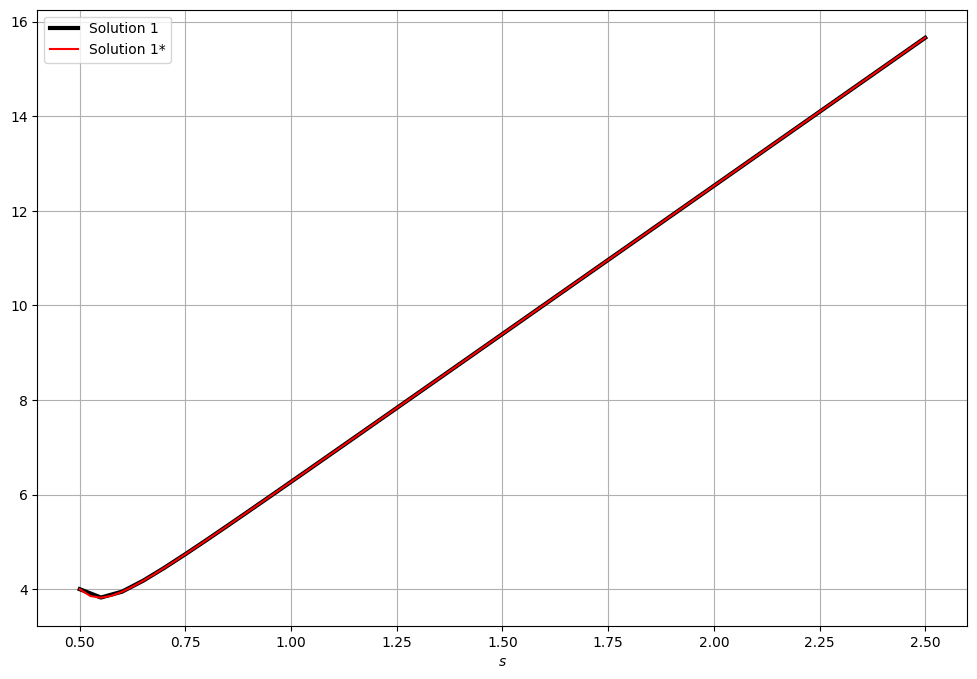

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(A, u1, color = "black", linewidth=3, label="Solution 1")
plt.plot(A_, u1_, color = "red",label="Solution 1*")

plt.xlabel(r'$s$')
plt.grid()
plt.legend()
plt.show()

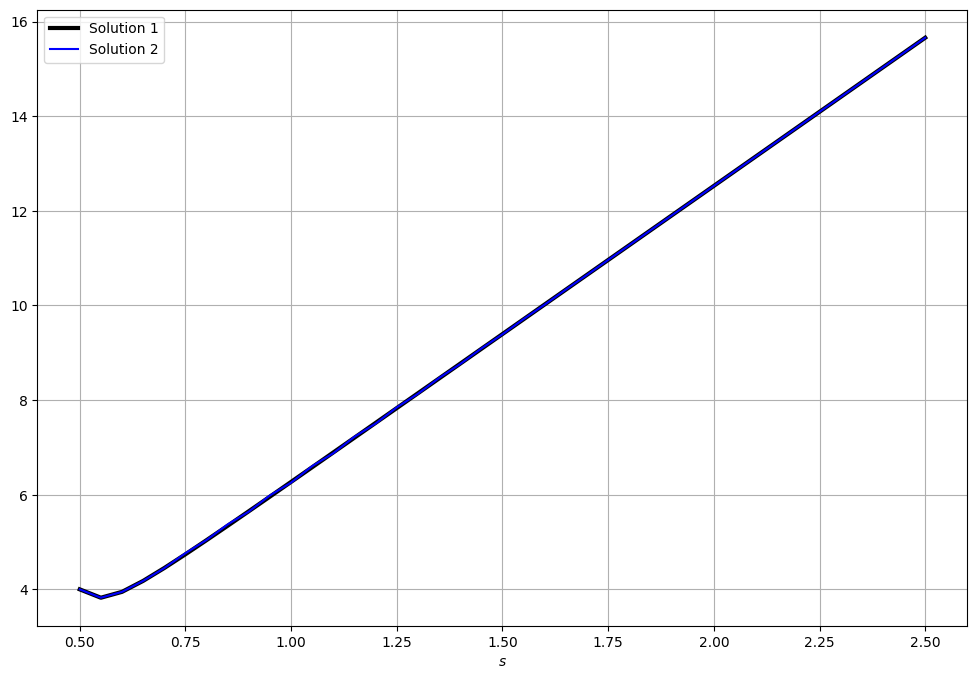

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(A, u1, color = "black", linewidth=3, label="Solution 1")
plt.plot(A, u2, color = "blue",label="Solution 2")

plt.xlabel(r'$s$')
plt.grid()
plt.legend()
plt.show()

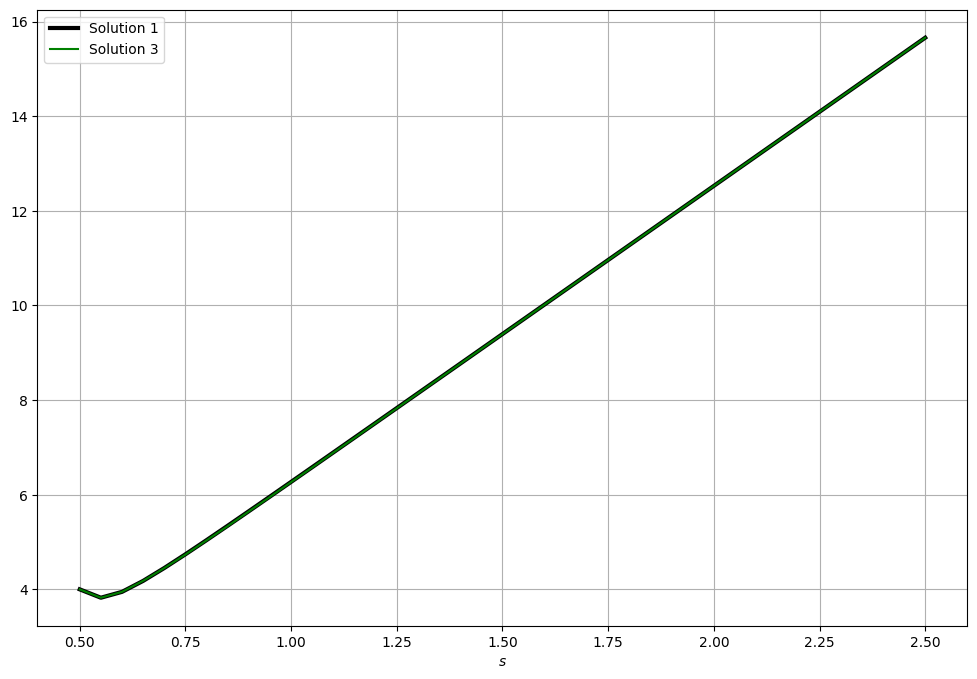

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(A, u1, color = "black", linewidth=3, label="Solution 1")
plt.plot(A, u3, color = "green",label="Solution 3")

plt.xlabel(r'$s$')
plt.grid()
plt.legend()
plt.show()